# Hypothesis Testing (Compairing the mean)

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

1. Has the network latency gone up since we switched internet service providers?

    - Null Hyp: New network lantency is > old network latency
    - Alt Hyp: New network lantency <= old network lantency
    
        - True positive: Trial result  identify that new network lantency is increased (becoming greater that old network lantency), and result match initial Hypothesis.

        - True negative: Trial result  identify that new network lantency is increased (becoming greater that old network lantency), and result don't match initial Hypothesis.

        - False negative: Trial result  identify that new network lantency is decreased (becoming less that old network lantency), and result don't match initial Hypothesis.
        - False positive: Trial result  identify that new network lantency is decreased (becoming less that old network lantency), and result match initial Hypothesis

2. Is the website redesign any good?
    - Null Hyp: Website redesign is > old website design.
    - Alt Hyp: Website redesign is <= old website design
        - True positive: Trial result identify website redesign is better (being better than old website design) and match the initial hypothesis.
        - True negative: Trial result identify website redesign is better (being better than old website design) and don't match the initial hypothesis.
        - False positive: Trial result identify website redesign is worst (being less than than old website design) and match the initial hypothesis.
        - False negative: Trial result identify website redesign is worst (being less than than old website design) and don't match the initial hypothesis.

### Tests
_______________________________________________________________________

|Goal|$H_{0}$|Data Needed|Parametric Test|Assumptions*|Non-parametric Test|  
|---|---|---|---|---|---|  
|Compare observed mean to theoretical one|$\mu_{obs} = \mu_{th}$|array-like of observed values & float of theoretical|One sample t-test: **scipy.stats.ttest_1samp**|Normally Distributed\*\*|One sample Wilcoxon signed rank test|   
|Compare two observed means (independent samples)|$\mu_{a} = \mu_{b}$|2 array-like samples|Independent t-test (or 2-sample): **scipy.stats.ttest_ind**|Independent, Normally Distributed\*\*, Equal Variances\*\*\*|Mann-Whitney's test|   
|Compare several observed means (independent samples)|$\mu_{a} = \mu_{b} = \mu_{n}$|n array-like samples|ANOVA: **scipy.stats.f_oneway**|Independent, Normally Distributed\*\*, Equal Variances|Kruskal-Wallis test|   

\*If assumptions can't be met, the equivalent non-parametric test can be used.   
\*\*Normal Distribution assumption can be be met by having a large enough sample (due to Central Limit Theorem), or the data can be scaled using a Gaussian Scalar.   
\*\*\*The argument in the stats.ttest_ind() method of `equal_var` can be set to `False` to accomodate this assumption. 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import env
import pydataset as datasets
import datetime

np.random.seed(52)

### 1. Answer with the type of test you would use (assume normal distribution):

- Is there a difference in grades of students on the second floor compared to grades of all students?
    - Since I am comparing **one** observed mean to a theoretical mean (mean of all the data), I need to use the **`One Sample T-Test`**.
- Are adults who drink milk taller than adults who dont drink milk?
    - Because I am comparing **two** observed means (independent samples), I will use the **`Two Sample T-Test`** or the ***`Independent T-Test`*.
- Is the the price of gas higher in texas or in new mexico?
    - Because I am comparing **two** observed means (independent samples), I will use the **`Two Sample T-Test`** or the ***`Independent T-Test`*.
- Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?
    - Because I am comparing **Three** observed means (independent samples), I will use the **`ANOVA Analysis of Varience`**.

### 2. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [6]:
office1_sample= 40
office1_mean= 90
office1_std = 15

office2_sample= 50
office2_mean = 100
office2_std = 20

Question: whether the average time it takes to sell homes is different for its two offices.

**Step 1: Plot the distributions**

In [7]:
# get distribution
office1_distribution = stats.norm(office1_mean,office1_std)
office2_distribution = stats.norm(office2_mean,office2_std)

# get random values
sample1 = office1_distribution.rvs(office1_sample)
sample2 = office2_distribution.rvs(office2_sample)

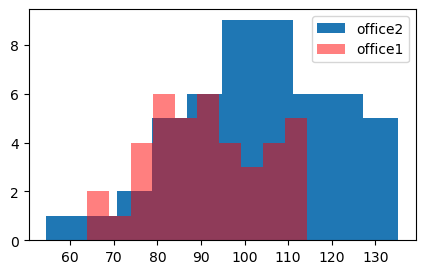

In [8]:
plt.figure(figsize = (5,3))
plt.hist(sample2, label = "office2")
plt.hist(sample1 , color = "red", alpha=.5,label="office1")

plt.legend()

**Step 2: Estabish Hypothesis**

I will decide my null hypothesis bases on the initial question.
- Null Hypothesis: The average time it takes to sell office one = the average time it takes to sell office 2
- Alternate Hypothesis: The average time it takes to sell office one != the average time it takes to sell office 2

**Step 3: Set Significant level**
- 0.05 for 95% accuracy

In [9]:
Alpha = 0.05

**Step 4: Verify Assumptions**
- Normal Distribution, or at least 30 observations and "kinda" normal. The more observations you have, the less "normal" it needs to appear. (CLT)

In [10]:
len(sample1),len(sample2)

(40, 50)

In [11]:
# To identify if varience is equal or not equal we run the levene function
# stats Levene test - returns p value. small p-value means unequal variances

t_stats, p_value = stats.levene(sample1, sample2)
print("P value:",p_value)

P value: 0.07612367438475164


- With my `p_value` being leess the the `Alpha`, It shows that the **varience are equal** in the two groups.

Now let plog it in the independent sample t-test.

**Step 5: Compute test statistic and probability (t-statistic & p-value) using**

In [12]:
# impliment the two sample T-Test for our example
# Equal Variances (the scipy methods we will use has an argument to handle when variances aren't equal).

t_stats, p_value = stats.ttest_ind(sample1,sample1)

print("Test stats", t_stats)
print("P value:",p_value)

Test stats 0.0
P value: 1.0


**Decide**

In [39]:
def Prob_distribution_conclude(t_stats,p_value, alpha):
    #evaluate p-value
    if (t_stats > 0) and (p_value < Alpha):
        print("We reject the null hypothesis")
    else:
        print("We fail to reject the null hypothesis")

Prob_distribution_conclude(t_stats,p_value, Alpha)

We fail to reject the null hypothesis


Becose the `Final_p_value` is greater than the `Alpha` value, we fail reject the hypothesis.

## 3. Load the mpg dataset and use it to answer the following questions:**

In [40]:
mpg = datasets.data("mpg")
mpg.head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact


**a. Is there a difference in fuel-efficiency in cars from 2008 vs 1999?**

Should I use arithmetic mean or harmonic mean for average mpg?
- Arithmetic Mean: fe_am = (cty + hwy)/2
- Harmonic Mean: fe_hm = 2/(1/cty + 1/hwy)

We will use harmonic mean because it is more appropriate for taking the average of rates, such as miles per gallon.

**b. Are compact cars more fuel-efficient than the average car?**
- We will use harmonic mean because it is more appropriate for taking the average of rates, such as miles per gallon.

**c. Do manual cars get better gas mileage than automatic cars?**


**Step 1: Plot the distributions**

(array([ 4., 12., 20., 23., 23., 15., 15.,  3.,  1.,  1.]),
 array([14.01059191, 19.07977945, 24.14896699, 29.21815453, 34.28734207,
        39.35652961, 44.42571714, 49.49490468, 54.56409222, 59.63327976,
        64.7024673 ]),
 <BarContainer object of 10 artists>)

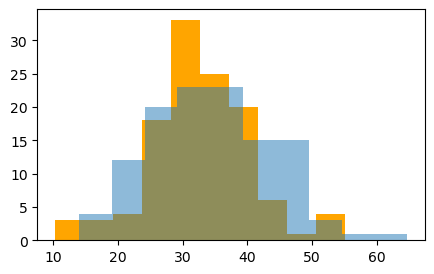

In [41]:
# question a
# create a column that computs for the fuel
mpg["total_miles"] = 2/(1/mpg["cty"]) + (1/mpg["hwy"])

# retreive only the total miles column
cars1 = mpg[mpg["year"] == 2008].total_miles
cars2 = mpg[mpg["year"] == 1999].total_miles

# get mean and standard deviation to create the normal distribution
cars1_mean, cars1_std = cars1.mean(), cars1.std()
cars2_mean, cars2_std = cars2.mean(), cars2.std()

# get normal distribution
cars1_dristribution = stats.norm(cars1_mean, cars1_std)
cars1_sample_dristribution = cars1_dristribution.rvs(len(cars1))

cars2_dristribution = stats.norm(cars2_mean, cars2_std)
cars2_sample_dristribution = cars2_dristribution.rvs(len(cars2))

# visual
plt.figure(figsize=(5,3))
plt.hist(cars1_sample_dristribution, color= "orange", label="2008")
plt.hist(cars2_sample_dristribution, alpha= 0.5, label= "1999")

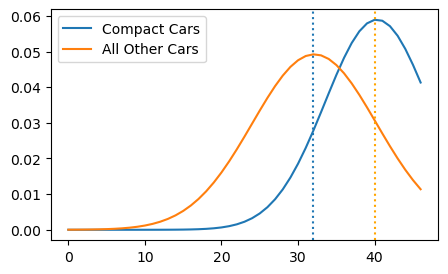

In [42]:
# Question b
compact_cars = mpg[mpg["class"] == "compact"].total_miles # get only compact cars
all_cars = mpg[mpg["class"] != "compact"].total_miles # full data with out compact cars

# get mean and std for runing the distribution
compact_cars_mean, compact_cars_std = compact_cars.mean(), compact_cars.std()
all_cars_mean, all_cars_std = all_cars.mean(), all_cars.std()


# get normal distribution
compact_cars_distribution = stats.norm(compact_cars_mean,compact_cars_std)
all_cars_distribution = stats.norm(all_cars_mean,all_cars_std)

# get random values
compact_cars_sample_distribution = compact_cars_distribution.rvs(len(compact_cars))
all_cars_sample_distribution = compact_cars_distribution.rvs(len(all_cars))

# set visual
x = np.arange(len(compact_cars))
y1 = compact_cars_distribution.pdf(x) # get density probability of compact cars
y2 = all_cars_distribution.pdf(x)


plt.figure(figsize=(5,3))
plt.plot(x, y1, label = 'Compact Cars')
plt.plot(x, y2, label = 'All Other Cars')
plt.axvline(32, ls = ':')
plt.axvline(40, ls = ':', color = 'orange')

plt.legend()
# plt.xlim(20,80)

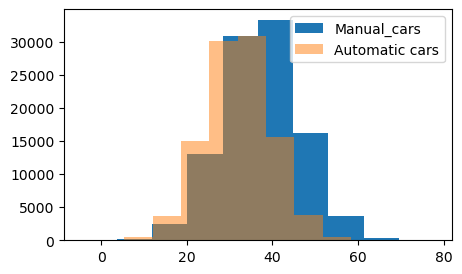

In [43]:
# Question c
# separate cars by transmission
manual_cars = mpg[mpg.trans.str.contains("manu")].total_miles
automatic_cars = mpg[mpg.trans.str.contains("auto")].total_miles

# get mean and std
manual_cars_mean, manual_cars_std = manual_cars.mean(), manual_cars.std()
automatic_cars_mmean, automatic_cars_std = automatic_cars.mean(), automatic_cars.std()

# create distribution
manual_cars_distribution = stats.norm(manual_cars_mean, manual_cars_std)
automatic_cars_distribution = stats.norm(automatic_cars_mmean, automatic_cars_std)

# gemerate ramdom values
manual_cars_sample_distribution = manual_cars_distribution.rvs(100_000)
automatic_cars_sample_distribution = automatic_cars_distribution.rvs(100_000)

# set visual
plt.figure(figsize=(5,3))
plt.hist(manual_cars_sample_distribution, label= "Manual_cars")
plt.hist(automatic_cars_sample_distribution, label= "Automatic cars", alpha=.5)

plt.legend()

**Step 2: Estabish Hypothesis**

I will decide my null hypothesis bases on the initial question.

**a**
- Null Hypothesis: Their is no significant difference in flue efficiency between 2008 cars and 1999 cars.
- Alternate Hypothesis: Their is a significant difference in flue efficiency between 2008 cars and 1999 cars.

**b**
- Null Hypothesis: Compact cars more fuel efficient than all other car class
- Alternate Hypothesis: Compact cars more fuel efficient than all other car class

**c**
- Null Hypothesis: Manual cars get better gas mileage than automatic cars.
- Alternate Hypothesis: cars get worst gas mileage than automatic cars.

**Step 3: Set Significant level**
- 0.05 for 95% accuracy

In [44]:
Alpha = 0.05

**Step 4: Verify Assumptions**
- Normal Distribution, or at least 30 observations and "kinda" normal. The more observations you have, the less "normal" it needs to appear. (CLT)

In [45]:
len(cars1),len(cars2)

(117, 117)

In [46]:
len(compact_cars), len(all_cars)

(47, 187)

In [47]:
len(manual_cars), len(automatic_cars)

(77, 157)

**Step 5: Compute test statistic and probability (t-statistic & p-value) using**

**a**

In [48]:
# question a
# To identify if varience is equal or not equal we run the levene function
# stats Levene test - returns p value. small p-value means unequal variances
t_stats,p_value = stats.levene(cars1_sample_dristribution,cars2_sample_dristribution)
print("P value:",p_value)


P value: 0.010909902446802514


With my `p_value` being greater the the `Alpha`, It shows that the **varience are equal** in the two groups.

Now let plog it in the independent sample t-test.

In [49]:
# impliment the two sample T-Test for our example
# Equal Variances (the scipy methods we will use has an argument to handle when variances aren't equal).
t_stats,p_value = stats.levene(cars1_sample_dristribution,cars2_sample_dristribution)

print("P value:",p_value)
print("Test stats:",t_stats)

P value: 0.010909902446802514
Test stats: 6.585620491342503


**Decide**

In [50]:
Prob_distribution_conclude(t_stats,p_value, Alpha)

We reject the null hypothesis


**b**

In [51]:
# impliment the one sample T-Test for our example
# Equal Variances (the scipy methods we will use has an argument to handle when variances aren't equal).
t_stats,p_value = stats.ttest_1samp(compact_cars, all_cars.mean())

print("P value:",p_value)
print("Test stats:",t_stats)

P value: 1.1668929788354502e-10
Test stats: 8.274932868047681


**Decide**

In [52]:
def Prob_distribution_conclude_sigle_tail(t_stats,p_value, Alpha):
    if (t_stats > 0) and ((p_value/2) < Alpha):
        print('We reject the null hypothesis')
    else:
        print('we fail to reject the null hypothesis')

Prob_distribution_conclude_sigle_tail(t_stats,p_value, Alpha)

We reject the null hypothesis


**c**

In [53]:
# To identify if varience is equal or not equal we run the levene function
# stats Levene test - returns p value. small p-value means unequal variances
t_stats,p_value = stats.levene(manual_cars_sample_distribution, automatic_cars_sample_distribution)

print("P value:",p_value)

P value: 0.0


With my `p_value` being less the the `Alpha`, It shows that the **varience are not equal** in the two groups. This means that we need to turn the `equal_var = False` for our `ttest_ind`.

Now let plog it in the independent sample t-test.

In [54]:
# impliment the one sample T-Test for our example
# Equal Variances (the scipy methods we will use has an argument to handle when variances aren't equal).
Final_t_stats,Final_p_value = stats.ttest_ind(manual_cars_sample_distribution, automatic_cars_sample_distribution, equal_var=False)

print("P value:",p_value)
print("Test stats:",t_stats)

P value: 0.0
Test stats: 1976.4083952079511


**Decide**

In [55]:
Prob_distribution_conclude_sigle_tail(t_stats,p_value, Alpha)

We reject the null hypothesis


# Correlation

1. Answer with the type of stats test you would use (assume normal distribution):
- Is there a relationship between the length of your arm and the length of your foot?
    - Pearson's R corolation
- Do guys and gals quit their jobs at the same rate?
    - Chi-Squred 
- Does the length of time of the lecture correlate with a students grade?
    - pearson's R corolation beacause we have two conitniuos variables

2. Use the telco_churn data.
- a. Does tenure correlate with monthly charges?
- b. Total charges?
- c. What happens if you control for phone and internet service?

In [56]:
query = """
SELECT tenure, Monthly_Charges, total_charges, internet_service_type_id,phone_service 
FROM customers;
"""

telco = pd.read_sql(query, env.get_db_access("telco_churn"))
telco.head()

,tenure,Monthly_Charges,total_charges,internet_service_type_id,phone_service
0,9,65.6,593.3,1,Yes
1,9,59.9,542.4,1,Yes
2,4,73.9,280.85,2,Yes
3,13,98.0,1237.85,2,Yes
4,3,83.9,267.4,2,Yes


### A and B

**Step 1: Determin the appropriate test**
 - Because the question is looking for correlation (relationship + significance) between two variables, I will use the pearson's r test

**Step 2: Setup**

- Set null and alternate hypothesis and the alpha-values ().

    **a**

    - $H_0$: There is no linear correlation between tenure and monthy charges.
    - $H_a$: There is a linear correlation between tenure and monthy charges.

    **b**

    - $H_0$: There is no linear correlation between tenure and total charges.
    - $H_a$: There is a linear correlation between tenure and total charges.


In [57]:
# confidence level
alpha = 0.05

**Step 3: Visualize**

In [58]:
# a bit of cleaning
telco = telco[telco["total_charges"] != " "]

<Axes: xlabel='tenure', ylabel='Monthly_Charges'>

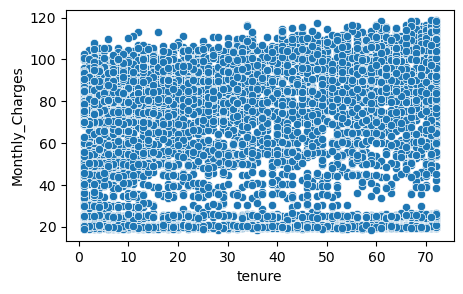

In [59]:
monthly_charges = telco["Monthly_Charges"]
est_tenure = telco["tenure"]

plt.figure(figsize=(5,3))
sns.scatterplot(y= monthly_charges, x= est_tenure)

<Axes: xlabel='tenure', ylabel='total_charges'>

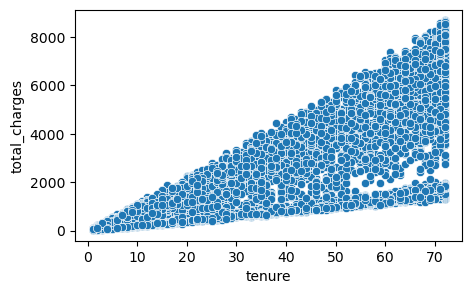

In [60]:
total_charges = telco.total_charges.astype(float)
est_tenure = telco.tenure

plt.figure(figsize=(5,3))
sns.scatterplot(x= est_tenure, y= total_charges)

**Step 4. Calculatate test statistics and p value**

In [61]:
r1, p_value1 = stats.pearsonr(monthly_charges, est_tenure)
r1, p_value1

(0.2468617666408956, 3.9898213232510553e-98)

In [62]:
r2, p_value2 = stats.pearsonr(total_charges, est_tenure)
r2, p_value2

(0.8258804609332071, 0.0)

**Step 5: Conclude**

In [67]:
def correlation_conclude(p_value, alpha):
    if p_value < alpha:
        print("We reject the null hypothesis")
    else:
        print("We fail to reject the null hypothesis")

In [68]:
# a
correlation_conclude(p_value1, alpha)
# b
correlation_conclude(p_value2, alpha)

We reject the null hypothesis
We reject the null hypothesis


**c. What happens if you control for phone and internet service?**

**Step 1: Determin the appropriate test**
 - Because the question is looking for correlation (relationship + significance) between two variables, I will use the pearson's r test

**Step 2: Setup**

- Set null and alternate hypothesis and the alpha-values ().

    - $H_0$: There is no correlation between phone service and monthly charges or total charges service.
    - $H_0$: There is a correlation between phone service and monthly charges or total charges service.
    
    - $H_02$: There is no correlation between internet service and monthly charges or total charges service.
    - $H_a2$: There is a correlation between internet service and monthly charges or total charges service.
    

In [93]:
alpha = 0.05

telco["telcom_setup"] = telco.internet_service_type_id.astype("str") + " " + telco.phone_service.astype("str")
telco.telcom_setup.value_counts()


2 Yes    3096
1 Yes    1736
3 Yes    1520
1 No      680
Name: telcom_setup, dtype: int64

In [109]:
options = telco.telcom_setup.value_counts().index
options

Index(['2 Yes', '1 Yes', '3 Yes', '1 No'], dtype='object')

**step 4 to 6**

In [97]:
def correlation_test(x, y):
    message = ""
    corr, p = stats.pearsonr(x, y)
    
    if p < alpha:
        message = "reject the null hypothesis that there is no linear correlation. Evidence supports a linear correlation." 
    else:
        message = "fail to reject the null hypothesis that there is no linear correlation. Insufficient evidence to support a linear correlation between the two values."
    
    return corr, p, message

In [111]:
# Montly charges correlation

output = []

for i in options:
    subset= telco[telco.telcom_setup == i]
    coeficient_r, p_value, message = correlation_test(subset.tenure, subset.Monthly_Charges)
    result = {
        "option": i,
        "coeficient_r": coeficient_r,
        "p_value": p_value,
        "message":message
        
    }
    output.append(result)
    
pd.DataFrame(output)
    

,option,coeficient_r,p_value,message
0,2 Yes,0.624621,0.000000e+00,reject the null hypothesis that there is no linear correlation. Evidence supports a li...
1,1 Yes,0.658094,5.781402e-216,reject the null hypothesis that there is no linear correlation. Evidence supports a li...
2,3 Yes,0.346188,4.896605e-44,reject the null hypothesis that there is no linear correlation. Evidence supports a li...
3,1 No,0.592430,1.173274e-65,reject the null hypothesis that there is no linear correlation. Evidence supports a li...


In [ ]:
# Total charges correlation

output = []

for i in options:
    subset= telco[telco.telcom_setup == i]
    coeficient_r, p_value, message = correlation_test(subset.tenure, subset.total_charges)
    result = {
        "option": i,
        "coeficient_r": coeficient_r,
        "p_value": p_value,
        "message":message
        
    }
    output.append(result)
    
pd.DataFrame(output)
    

we reject the null hypothesis that says there is no linear relationship between total charges and tenure.

3. Use the employees database.
- Is there a relationship between how long an employee has been with the company and their salary?
- Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [120]:
query = """
select datediff(curdate(), hire_date) as days_on_job, salary
from employees
join salaries using(emp_no)
where to_date > curdate();
"""

employees = pd.read_sql(query, env.get_db_access("employees"))
employees.head()

,days_on_job,salary
0,13493,88958
1,13710,72527
2,13430,43311
3,13335,74057
4,12319,94692


a. Is there a relationship between how long an employee has been with the company and their salary?

**Step 1: Determin the appropriate test**
 - Because the question is looking for correlation (relationship + significance) between two variables, I will use the pearson's r test

**Step 2: Setup**

- Set null and alternate hypothesis and the alpha-values ().

    **a**
    - $H_0$: There is a relationship between how long an employee has been witht the company and thier salary.
    - $H_a$: There is no relationship between how long an employee has been witht the company and thier salary.
    
    **b**
    - $H_0$ There is no relationship between how long an employee has been witht the company and the number of titles they have had.
    - $H_a$: There is a relationship between how long an employee has been witht the company and the number of titles they have had.


In [113]:
alpha = 0.05

<Axes: xlabel='days_on_job', ylabel='salary'>

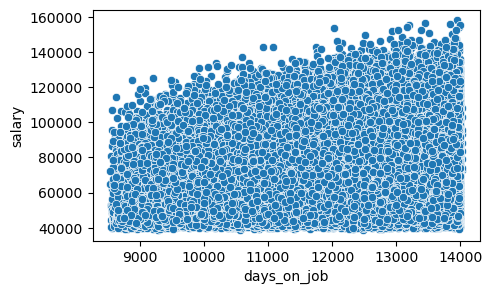

In [117]:
plt.figure(figsize=(5,3))
sns.scatterplot(x="days_on_job", y="salary", data=employees)

In [118]:
corr, p = stats.pearsonr(employees.days_on_job, employees.salary)

if p < alpha:
    print("We reject the null hypothesis")
    print("Evidence supports the claim that there is a linear correlation")
else:
    print("We fail to reject the null hypothesis")

corr, p


We reject the null hypothesis
Evidence supports the claim that there is a linear correlation


(0.3064625613186014, 0.0)

**b. Is there a relationship between how long an employee has been with the company and the number of titles they have had?**

In [121]:
query= """
select emp_no, count(title) as title_count, datediff(curdate(), hire_date) as days_on_job
from employees
join titles using(emp_no)
group by emp_no;
"""

employees = pd.read_sql(query, env.get_db_access("employees"))
employees.head()

,emp_no,title_count,days_on_job
0,10001,1,13493
1,10002,1,13710
2,10003,1,13430
3,10004,2,13335
4,10005,2,12319


In [123]:
corr, p = stats.pearsonr(employees.days_on_job, employees.title_count)

if p < alpha:
    print("We reject the null hypothesis")
    print("Evidence supports the claim that there is a linear correlation between tenure and number of titles")
else:
    print("We fail to reject the null hypothesis")

corr, p

We reject the null hypothesis
Evidence supports the claim that there is a linear correlation between tenure and number of titles


(0.2665989299134097, 0.0)

### 4. Use the sleepstudy data.
- Is there a relationship between days and reaction time?

In [124]:
df = datasets.data("sleepstudy")
df.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


$H_0$:There is no linear relationship between days and reaction time

$H_a$: There is a linear relationship between days and reaction time

In [126]:
corr, p = stats.pearsonr(df.Days, df.Reaction)

if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

corr, p

We reject the null hypothesis


(0.5352302262650255, 9.89409632221439e-15)

# Comparison of Groups

1. Answer with the type of stats test you would use (assume normal distribution):

- Do students get better test grades if they have a rubber duck on their desk?
    - One sample t-test
- Does smoking affect when or not someone has lung cancer?
    - Chi-squre test
- Is gender independent of a person’s blood type?
    - Chi-square test
- A farming company wants to know if a new fertilizer has improved crop yield or not
    - two sample t-test, indipendent t-test
- Does the length of time of the lecture correlate with a students grade?
     - chi-square test
- Do people with dogs live in apartments more than people with cats?
    - pearon'r 
    
2. Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.
||Codeup Student|Not Codeup Student|
|----|----|----|
|Use macbook|49|20|
|Doesn't use mackbook|1|30|

$H_0$: There is NO indipendent relationshp between using macbook and being a codeup student.
$H_a$: There is a indipendent relationshp between using macbook and being a codeup student.

In [127]:
alpha = 0.05
observed = [[40,20],
            [1,30]]

# use the chi2 function
chi_square, p_value, degree_of_freedom, expected =stats.chi2_contingency(observed)

print('Observed')
print(observed)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi_square:.4f}')
print(f'p_value     = {p_value:.4f}')

Observed
[[40, 20], [1, 30]]

Expected
[[27 32]
 [13 17]]

----
chi^2 = 30.7173
p_value     = 0.0000


In [128]:
if p_value < alpha:
    print('We reject the null')
else:
    print("we fail to reject the null")

We reject the null


Choose another 2 categorical variables from the mpg dataset and perform a $chi^2$ contingency table test with them. Be sure to state your null and alternative hypotheses.

In [129]:
mpg = datasets.data("mpg")
mpg.head(10).T

,1,2,3,4,5,6,7,8,9,10
manufacturer,audi,audi,audi,audi,audi,audi,audi,audi,audi,audi
model,a4,a4,a4,a4,a4,a4,a4,a4 quattro,a4 quattro,a4 quattro
displ,1.8,1.8,2.0,2.0,2.8,2.8,3.1,1.8,1.8,2.0
year,1999,1999,2008,2008,1999,1999,2008,1999,1999,2008
cyl,4,4,4,4,6,6,6,4,4,4
trans,auto(l5),manual(m5),manual(m6),auto(av),auto(l5),manual(m5),auto(av),manual(m5),auto(l5),manual(m6)
drv,f,f,f,f,f,f,f,4,4,4
cty,18,21,20,21,16,18,18,18,16,20
hwy,29,29,31,30,26,26,27,26,25,28
fl,p,p,p,p,p,p,p,p,p,p


In [130]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


In [131]:
mpg.manufacturer.value_counts()

dodge         37
toyota        34
volkswagen    27
ford          25
chevrolet     19
audi          18
hyundai       14
subaru        14
nissan        13
honda          9
jeep           8
pontiac        5
land rover     4
mercury        4
lincoln        3
Name: manufacturer, dtype: int64

In [132]:
mpg.trans.value_counts()

auto(l4)      83
manual(m5)    58
auto(l5)      39
manual(m6)    19
auto(s6)      16
auto(l6)       6
auto(av)       5
auto(s5)       3
auto(s4)       3
auto(l3)       2
Name: trans, dtype: int64

**Step 1**: Formulate Hypothesis

- $H_0$: There is no independent relationship between between Car manufacturers and transmission type.
- $H_a$: There is independent relationship between between Car manufacturers and transmission type.

In [133]:
auto = mpg.trans.str.contains("auto")

mpg["new_trans"]=mpg["trans"].where(auto, True,False)
mpg
# mpg["trans"].where(mpg.trans.str.contains("manu"), "Manual").value_counts()


/var/folders/jq/1gsqwxz13gxf_lpnwb_27r0c0000gn/T/ipykernel_39631/712578513.py:3: FutureWarning: In a future version of pandas all arguments of Series.where except for the arguments 'cond' and 'other' will be keyword-only.
  mpg["new_trans"]=mpg["trans"].where(auto, True,False)


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,new_trans
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,auto(l5)
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,True
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,True
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,auto(av)
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,auto(l5)
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,auto(s6)
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,True
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,auto(l5)
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,True


**Step 2**: Create a pivit table for the observed data

In [134]:
alpha= 0.05

# use crosstab function
observed = pd.crosstab(mpg.trans, mpg.manufacturer)
observed

manufacturer,audi,chevrolet,dodge,ford,honda,hyundai,jeep,land rover,lincoln,mercury,nissan,pontiac,subaru,toyota,volkswagen
trans,,,,,,,,,,,,,,,
auto(av),2,0,0,0,0,0,0,0,0,0,3,0,0,0,0
auto(l3),0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
auto(l4),0,14,16,10,2,6,2,2,2,1,3,4,5,11,5
auto(l5),5,0,11,5,2,1,6,0,0,2,1,0,0,4,2
auto(l6),0,0,2,2,0,0,0,0,1,1,0,0,0,0,0
auto(s4),0,0,0,0,0,0,0,0,0,0,0,1,2,0,0
auto(s5),0,0,0,0,0,0,0,0,0,0,1,0,0,2,0
auto(s6),4,2,0,0,0,0,0,2,0,0,0,0,0,2,6
manual(m5),4,0,3,7,4,6,0,0,0,0,3,0,7,13,11


**Step 3**: create the Chi squared contegency table

In [135]:
# use chi2_contingency functino
chi_square, p_value, degree_of_freedom, expected = stats.chi2_contingency(observed)

print('Observed')
print(observed)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi_square:.4f}')
print(f'p_value     = {p_value:.4f}')

Observed
manufacturer  audi  chevrolet  dodge  ford  honda  hyundai  jeep  land rover  \
trans                                                                          
auto(av)         2          0      0     0      0        0     0           0   
auto(l3)         0          0      1     0      0        0     0           0   
auto(l4)         0         14     16    10      2        6     2           2   
auto(l5)         5          0     11     5      2        1     6           0   
auto(l6)         0          0      2     2      0        0     0           0   
auto(s4)         0          0      0     0      0        0     0           0   
auto(s5)         0          0      0     0      0        0     0           0   
auto(s6)         4          2      0     0      0        0     0           2   
manual(m5)       4          0      3     7      4        6     0           0   
manual(m6)       3          3      4     1      1        1     0           0   

manufacturer  lincoln  mercury

**Step 3**: conclusion

In [136]:
if p_value < alpha:
    print('We reject the null')
else:
    print("we fail to reject the null")

We reject the null


4. Use the data from the employees database to answer these questions:

- Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

In [137]:
query = """
SELECT * 
FROM employees
JOIN titles USING(emp_no);
"""

employees = pd.read_sql(query, env.get_db_access("employees"))
employees.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01


In [138]:
observed = pd.crosstab(employees.gender, employees.title)

In [139]:
chi_square, p_value, degree_of_freedom, expected = stats.chi2_contingency(observed)

print('Observed')
print(observed)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi_square:.4f}')
print(f'p_value     = {p_value:.4f}')

Observed
title   Assistant Engineer  Engineer  Manager  Senior Engineer  Senior Staff  \
gender                                                                         
F                     5952     46063       13            39141         37087   
M                     9176     68940       11            58609         55766   

title   Staff  Technique Leader  
gender                           
F       42854              6114  
M       64537              9045  

Expected
[[ 6047 45975     9 39078 37120 42932  6060]
 [ 9080 69027    14 58671 55732 64458  9098]]

----
chi^2 = 6.0729
p_value     = 0.4151


In [140]:
if p_value < alpha:
    print('We reject the null')
else:
    print("we fail to reject the null")

we fail to reject the null


- Is an employee's gender independent of whether or not they are or have been a manager?

In [141]:
# select only managers
managers = employees[employees.title.str.contains("anager")].title

# get crosstab
observed = pd.crosstab(employees.gender, managers)
observed

title,Manager
gender,
F,13
M,11


In [142]:
# perform the chi square test
chi_square, p_value, degree_of_freedom, expected = stats.chi2_contingency(observed)

print('Observed')
print(observed)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi_square:.4f}')
print(f'p_value     = {p_value:.4f}')

Observed
title   Manager
gender         
F            13
M            11

Expected
[[13]
 [11]]

----
chi^2 = 0.0000
p_value     = 1.0000


In [143]:
if p_value < alpha:
    print('We reject the null')
else:
    print("we fail to reject the null")

we fail to reject the null
